**Computer Vision LAB-5B**

*   Mudasir
*   22K-8732

**Lab-5B (Transforms & Features)**

Saving Computer_Lab_with_Monitorsjpg.jpg to Computer_Lab_with_Monitorsjpg.jpg


Text(0.5, 1.0, 'Uploaded Image')

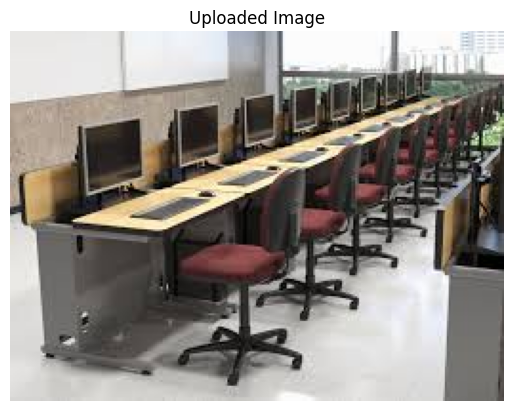

In [2]:
from google.colab import files
import cv2, numpy as np, matplotlib.pyplot as plt

# Upload image
uploaded = files.upload()
fname = next(iter(uploaded))
img = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 1)  # 1 = color, 0 = grayscale

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off"); plt.title("Uploaded Image")


Text(0.5, 1.0, 'Detected Screens')

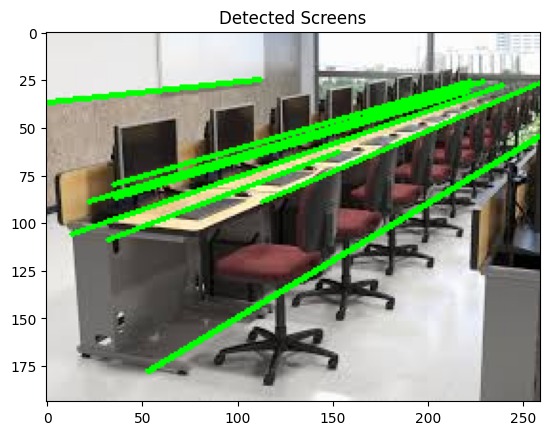

In [3]:
# Task 1: Screen Detection (Hough Lines)

edges = cv2.Canny(img,50,150)
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=100,maxLineGap=10)

out = img.copy()
for l in lines:
    x1,y1,x2,y2 = l[0]
    cv2.line(out,(x1,y1),(x2,y2),(0,255,0),2)

plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title("Detected Screens")

Saving Reference_Photo.jpg to Reference_Photo.jpg


Text(0.5, 1.0, 'SIFT Matching')

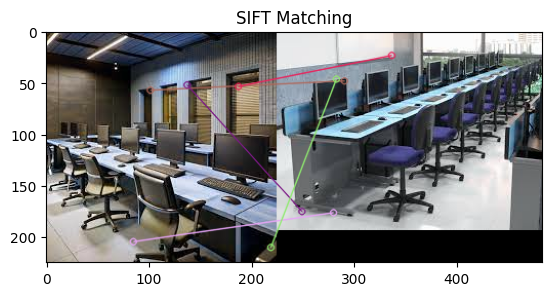

In [5]:
# Task 2: Asset Tracking (SIFT)

# Upload image
uploaded = files.upload()
fname = next(iter(uploaded))
ref_img = cv2.imdecode(np.frombuffer(uploaded[fname], np.uint8), 1)

sift=cv2.SIFT_create()
kp1,des1=sift.detectAndCompute(ref_img,None)
kp2,des2=sift.detectAndCompute(img,None)
bf=cv2.BFMatcher()
matches=bf.knnMatch(des1,des2,k=2)

good=[m for m,n in matches if m.distance<0.75*n.distance]
out=cv2.drawMatchesKnn(ref_img,kp1,img,kp2,[ [m] for m in good],None,flags=2)
plt.imshow(out); plt.title("SIFT Matching")

Text(0.5, 1.0, 'Detail coeffs (anomalies)')

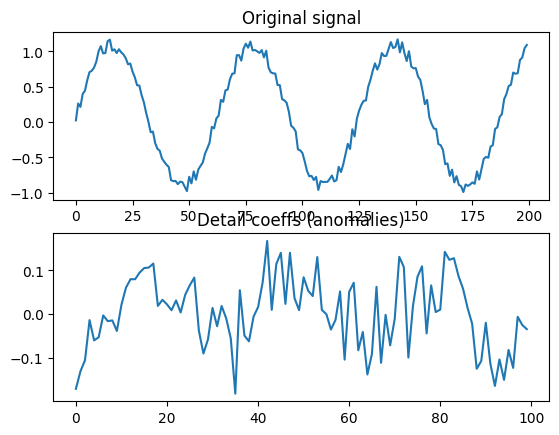

In [6]:
# Task 3: Wavelet (Anomaly detection in data)

import pywt, numpy as np, matplotlib.pyplot as plt
data = np.sin(np.linspace(0,20,200)) + np.random.rand(200)*0.2
coeffs = pywt.dwt(data, 'db1')
cA,cD = coeffs
plt.subplot(2,1,1); plt.plot(data); plt.title("Original signal")
plt.subplot(2,1,2); plt.plot(cD); plt.title("Detail coeffs (anomalies)")

In [8]:
# Task 4: Object Recognition

# (Same SIFT code as Task 2, loop over test images.)

In [9]:
# Task 5: Panoramic Image (SIFT stitching)

# (Use SIFT matching + homography → warp → stitch. Or simpler: use cv2.Stitcher_create() as before.)


Text(0.5, 1.0, 'Lane Lines')

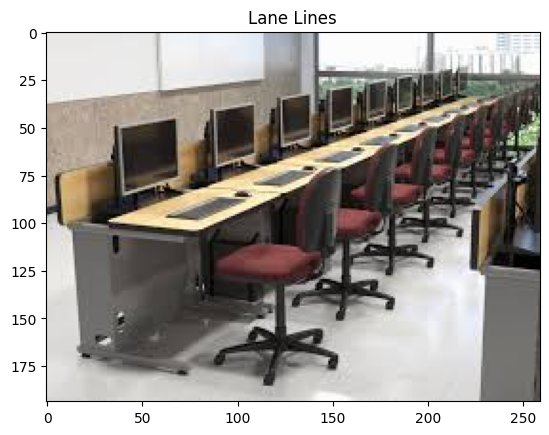

In [11]:
# Task 6: Lane Detection (Hough Lines)

edges=cv2.Canny(img,50,150)
lines=cv2.HoughLinesP(edges,1,np.pi/180,50,100,50)
out=img.copy()
if lines is not None:  # Add this check
  for l in lines: x1,y1,x2,y2=l[0]; cv2.line(out,(x1,y1),(x2,y2),(0,255,0),2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB)); plt.title("Lane Lines")

Text(0.5, 1.0, 'Coins Detected')

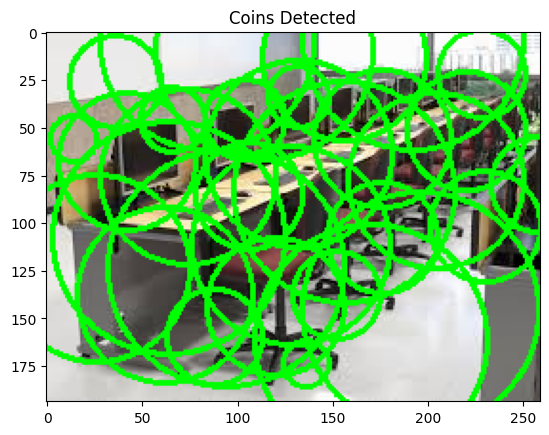

In [12]:
# Task 7: Coin Detection (Hough Circles)

gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
circles=cv2.HoughCircles(gray,cv2.HOUGH_GRADIENT,1,30,param1=50,param2=30,minRadius=10,maxRadius=80)

out=img.copy()
if circles is not None:
    for x,y,r in np.uint16(np.around(circles[0,:])):
        cv2.circle(out,(x,y),r,(0,255,0),2)

plt.imshow(cv2.cvtColor(out,cv2.COLOR_BGR2RGB)); plt.title("Coins Detected")

Text(0.5, 1.0, 'Detected Boundaries')

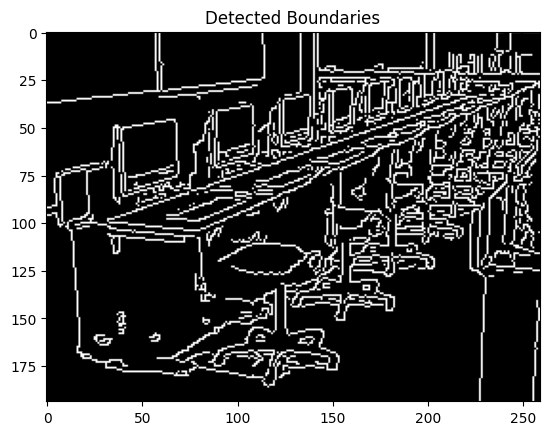

In [13]:
# Task 8: Smart Security (Boundary detection)

edges=cv2.Canny(img,100,200)
plt.imshow(edges,cmap='gray'); plt.title("Detected Boundaries")
